In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

(550, 900, 3)


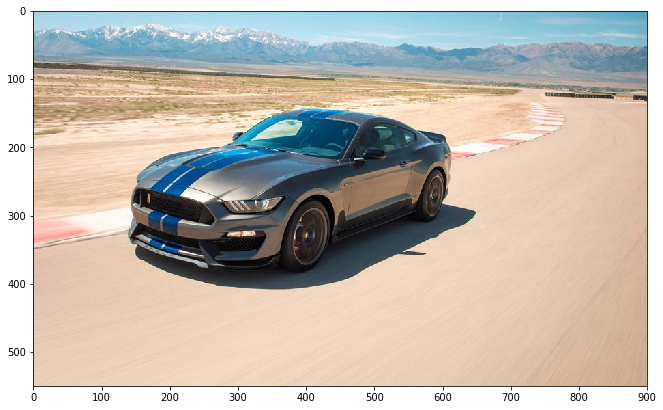

In [2]:
#Reads in BGR
img=cv2.imread("../../../../Downloads/2018-ford-mustang-shelby-gt350-gt350r-in-depth-model-review-car-and-driver-photo-694522-s-original.jpg")
print(img.shape)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(11,7))
plt.imshow(img)
plt.show()

In [3]:
# Flatten each channel of the image
all_pixels=img.reshape((550*900,3))
print(all_pixels.shape)

(495000, 3)


In [4]:
dominant_colors=16
km=KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=16, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [5]:
km.labels_

array([8, 8, 8, ..., 4, 4, 4], dtype=int32)

In [6]:
km.cluster_centers_

array([[240.60717684, 212.908432  , 189.2132036 ],
       [ 95.80197802,  93.44688645,  89.99941392],
       [ 25.50341023,  23.85594509,  25.99795821],
       [146.58833399, 193.17884906, 211.18880376],
       [192.95081967, 163.34088717, 125.50819672],
       [ 49.12989749,  59.23093667,  66.54262042],
       [117.67205043, 165.69998159, 188.04302411],
       [213.8214678 , 183.56527801, 156.29149062],
       [176.59368968, 217.92906459, 232.63303638],
       [ 95.52371688, 126.30220493, 145.87011303],
       [250.27307972, 237.03561909, 220.34056215],
       [  7.84526383,  78.48251748, 121.81996186],
       [228.95740069, 201.2621352 , 177.68105639],
       [158.92110587, 165.67493498, 168.68187073],
       [ 16.78849722, 135.21706865, 186.25862709],
       [149.58837735, 127.13951858, 102.74892888]])

In [7]:
centers=np.array(km.cluster_centers_,dtype='uint8')

In [8]:
print(centers)

[[240 212 189]
 [ 95  93  89]
 [ 25  23  25]
 [146 193 211]
 [192 163 125]
 [ 49  59  66]
 [117 165 188]
 [213 183 156]
 [176 217 232]
 [ 95 126 145]
 [250 237 220]
 [  7  78 121]
 [228 201 177]
 [158 165 168]
 [ 16 135 186]
 [149 127 102]]


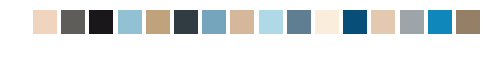

In [9]:
#Plot the colors obtained
i=1
plt.figure(0,figsize=(8,4))
colors=[]
for each_col in centers:
    plt.subplot(1,16,i)
    plt.axis('off')
    i+=1
    colors.append(each_col)
    
    #Color Swatch
    a=np.zeros((100,100,3),dtype='uint8')
    a[:,:,:]=each_col
    plt.imshow(a)
plt.show()

In [10]:
print(colors)

[array([240, 212, 189], dtype=uint8), array([95, 93, 89], dtype=uint8), array([25, 23, 25], dtype=uint8), array([146, 193, 211], dtype=uint8), array([192, 163, 125], dtype=uint8), array([49, 59, 66], dtype=uint8), array([117, 165, 188], dtype=uint8), array([213, 183, 156], dtype=uint8), array([176, 217, 232], dtype=uint8), array([ 95, 126, 145], dtype=uint8), array([250, 237, 220], dtype=uint8), array([  7,  78, 121], dtype=uint8), array([228, 201, 177], dtype=uint8), array([158, 165, 168], dtype=uint8), array([ 16, 135, 186], dtype=uint8), array([149, 127, 102], dtype=uint8)]


### Segmenting Our Original Image

In [11]:
new_img=np.zeros((550*900,3),dtype='uint8')
print(new_img.shape)

(495000, 3)


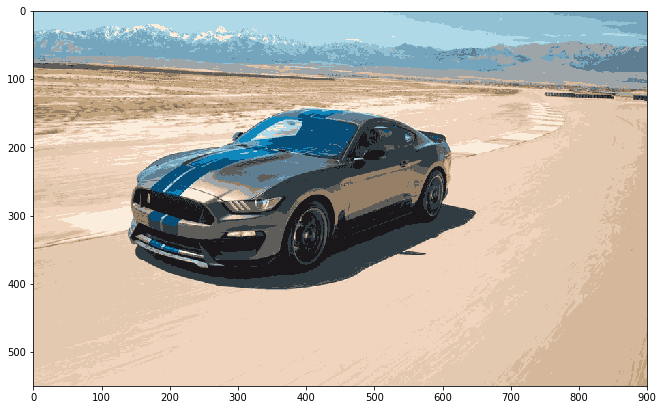

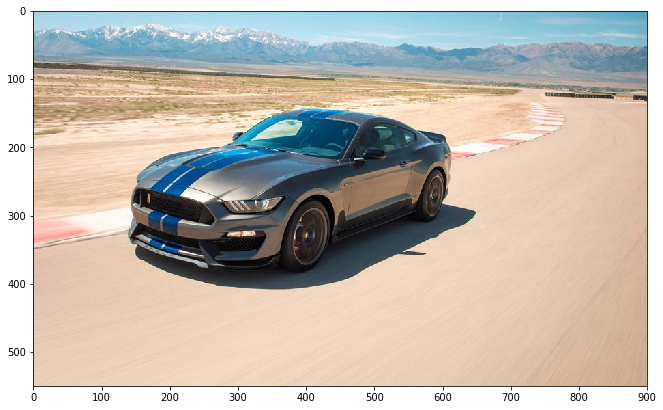

In [12]:
for ix in range(new_img.shape[0]):
    new_img[ix]=colors[km.labels_[ix]]
new_img=new_img.reshape((550, 900, 3))
plt.figure(figsize=(11,7))
plt.imshow(new_img)
plt.show()
plt.figure(figsize=(11,7))
plt.imshow(img)
plt.show()